In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
columns_X = [
    "CB Rank (Company)",
    "Number of Articles",
    "Number of Founders",
    "Number of Funding Rounds",
    "Last Funding Amount Currency (in USD)",
    "Last Equity Funding Amount Currency (in USD)",
    "Total Equity Funding Amount Currency (in USD)",
    "Total Funding Amount Currency (in USD)",
    "Number of Lead Investors",
    "Number of Investors",
    "Number of Events",
    "BuiltWith - Active Tech Count",
    "G2 Stack - Total Products Active",
    "minEstimatedRevenueRange",
    "maxEstimatedRevenueRange",
    "minNumberEmployees",
    "maxNumberEmployees",
    "isCompanyTypeForProfit",
    "isCompanyPrivate",
    "hasWebsite",
    "hasTwitter",
    "hasFacebook",
    "hasLinkedIn",
    "hasContactEmail",
    "hasPhoneNumber",
    "isOperating"
]

X = pd.read_csv('.\\ETL-out.csv')
for column in X.columns:
    if (not column in columns_X ):
        del X[column]

In [3]:
columns_y = ["isInTop100"]

y = pd.read_csv('.\\ETL-out.csv')
for column in y.columns:
    if (not column in columns_y ):
        del y[column]

In [4]:
X.shape

(229, 26)

In [5]:
X.head(5)

,CB Rank (Company),Number of Articles,Number of Founders,Number of Funding Rounds,Last Funding Amount Currency (in USD),Last Equity Funding Amount Currency (in USD),Total Equity Funding Amount Currency (in USD),Total Funding Amount Currency (in USD),Number of Lead Investors,Number of Investors,...,maxNumberEmployees,isCompanyTypeForProfit,isCompanyPrivate,hasWebsite,hasTwitter,hasFacebook,hasLinkedIn,hasContactEmail,hasPhoneNumber,isOperating
0,1.457,8.0,5.0,7,35000000,35000000.0,57649998.0,58174998,3.0,12.0,...,250.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,2.462,7.0,2.0,3,6000000,6000000.0,8540000.0,8540000,1.0,6.0,...,5000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3.109,12.0,4.0,2,2100000,2100000.0,2100000.0,2100000,1.0,13.0,...,5000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,3.449,4.0,2.0,12,6500000,6500000.0,10550000.0,29092905,3.0,5.0,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,3.607,2.0,4.0,4,1200000,1200000.0,2065000.0,2105000,1.0,7.0,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [6]:
y.shape

(229, 1)

In [7]:
X_std = StandardScaler().fit_transform(X)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00438596e+00 -2.11156754e-01 -1.43730342e-01 -3.32805283e-01
  -8.02292062e-02 -8.22356536e-02 -9.65216552e-02 -1.03842498e-01
  -3.56678802e-01 -2.78995262e-01 -1.14998906e-01 -4.02030028e-01
  -1.62577893e-02 -7.78712116e-02 -6.93291065e-02 -1.06416093e-01
  -8.02612925e-02  7.55587646e-02  4.46427110e-03 -3.16944405e-01
   8.72646526e-02 -1.06679724e-01 -4.51783278e-01 -1.49436247e-01
  -3.64969443e-02 -2.75104043e-01]
 [-2.11156754e-01  1.00438596e+00  1.53488870e-01  4.02691551e-01
   4.45435834e-01  2.27045931e-01  6.63445049e-01  7.44253285e-01
   5.94477664e-01  5.83520626e-01  2.41758771e-01  2.00728330e-01
   3.31240551e-01 -2.06304928e-04 -2.10462872e-02  3.06203921e-01
   2.74240177e-01  2.77653056e-02 -1.84637271e-01  5.53590647e-02
   8.47168752e-02  8.11627232e-02  1.59254627e-01  7.56520474e-02
  -1.03684613e-01  7.64099972e-02]
 [-1.43730342e-01  1.53488870e-01  1.00438596e+00  3.19939333e-01
  -1.25668184e-01 -9.27451780e-02 -2.45826873e

In [8]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.75359657e-01 -2.22497369e-01 -1.55346717e-01  1.67807117e-01
   3.45530708e-01 -6.82032912e-02 -1.71510046e-03  4.31490068e-03
   4.99627238e-02  3.09313877e-02 -2.36229711e-01  3.46136650e-02
  -8.27202558e-02 -2.01113353e-01 -1.65538884e-01 -5.62846988e-02
  -9.57596533e-02 -3.82551831e-01 -5.76098513e-02  4.98794505e-02
  -5.02716300e-01 -2.04614601e-01 -1.54525256e-01  2.90765376e-01
   1.94787146e-01  5.28523501e-02]
 [ 3.73857895e-01  5.51072829e-02 -1.13041137e-01  3.51970160e-02
   7.76206125e-02  1.42462161e-01 -5.87004664e-03 -8.11026756e-02
   1.71508161e-01  5.33442839e-01 -8.41627309e-02 -3.62546293e-02
  -1.47760857e-01  3.13286666e-01  2.85110269e-02  1.12918206e-01
   3.29660458e-01  2.87943661e-01  2.12043332e-02 -2.93834468e-02
  -2.53851116e-01 -2.10330154e-01 -1.60570937e-01  9.65355371e-02
  -9.47216435e-02 -9.31152794e-02]
 [ 5.56929732e-02  2.78045063e-01  5.08915621e-02 -1.23398566e-02
   2.70984312e-01  1.14177943e-01 -4.25656523e-03 -2.82634

In [9]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.912245750429123
3.0201922150701974
2.5502945378034636
1.969536169238358
1.7398580222523303
1.2546216086426745
1.1270109561812742
1.0936117108648045
0.9987229604633341
0.9108858284347017
0.8510344617635391
0.7449555053936743
0.7331995594865258
0.6455660670288373
0.5869022551758594
0.5123039373932055
0.5009543384323201
0.48570335600248954
0.4115936400921066
0.3493964105869995
0.3100625396577722
0.23473645162199175
0.07919950582824664
0.05938023436048195
0.031314844291713974
0.000752221223259712


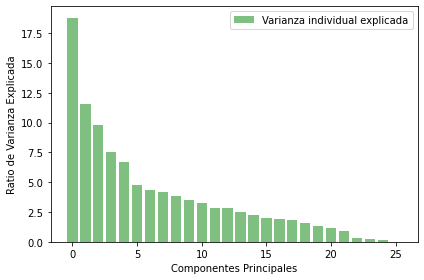

In [10]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

tamanio = len(columns_X)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):  
    plt.bar(np.arange(0,tamanio), var_exp, alpha=0.5, align='center', label='Varianza individual explicada', color='g')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [11]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(tamanio,1),
                      eig_pairs[1][1].reshape(tamanio,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[-0.17535966 -0.22249737]
 [ 0.37385789  0.05510728]
 [ 0.05569297  0.27804506]
 [ 0.19582088  0.29975353]
 [ 0.29395314 -0.27910233]
 [ 0.21439271 -0.12800922]
 [ 0.32685366 -0.02315579]
 [ 0.3847422  -0.18789019]
 [ 0.30745898  0.1897632 ]
 [ 0.2749862   0.21194147]
 [ 0.08960797  0.05310365]
 [ 0.16142176  0.21707408]
 [ 0.16549484  0.07283253]
 [ 0.07816513 -0.21557683]
 [ 0.07573483 -0.22671585]
 [ 0.23497539 -0.24344449]
 [ 0.23130605 -0.31129634]
 [ 0.01657816  0.05269445]
 [-0.11681478  0.14987092]
 [ 0.05827116  0.11152506]
 [ 0.05309269  0.1309917 ]
 [ 0.06597594  0.22287978]
 [ 0.12146456  0.23884402]
 [ 0.05552601  0.21172781]
 [-0.03699343  0.21526377]
 [ 0.07015091  0.08503377]]


In [12]:
Y

array([[ 3.21415786e+00,  4.03749224e+00],
       [ 5.89115568e-01, -3.58196829e-01],
       [ 1.58410129e+00,  1.42400210e+00],
       [ 2.52079144e+00,  4.38379882e+00],
       [ 1.42830779e+00,  2.73905175e+00],
       [ 1.04779011e+00,  1.48104353e+00],
       [ 3.14694999e+00,  3.88605235e+00],
       [ 2.97174122e+00,  3.33470467e+00],
       [ 1.68480090e+00,  1.87083424e+00],
       [ 1.85620323e+00,  1.60055114e+00],
       [ 2.15604664e+01,  3.21838135e+00],
       [ 6.76830896e-01,  6.60009202e-01],
       [ 3.40302331e-01,  1.06751939e+00],
       [-2.64985458e-01,  1.60769183e+00],
       [ 1.51624685e+00,  1.73775258e+00],
       [ 1.28793102e+00,  1.79606317e+00],
       [ 8.80535986e-01,  1.42174014e+00],
       [ 7.58055979e-01,  2.19908772e+00],
       [ 6.36574614e-01,  1.89557418e+00],
       [ 3.20211221e-01,  3.48300163e-02],
       [-3.88158389e-01,  1.71107504e+00],
       [ 8.44231938e-01, -5.43834279e+00],
       [ 1.72839587e+00,  1.33829082e+00],
       [ 7.

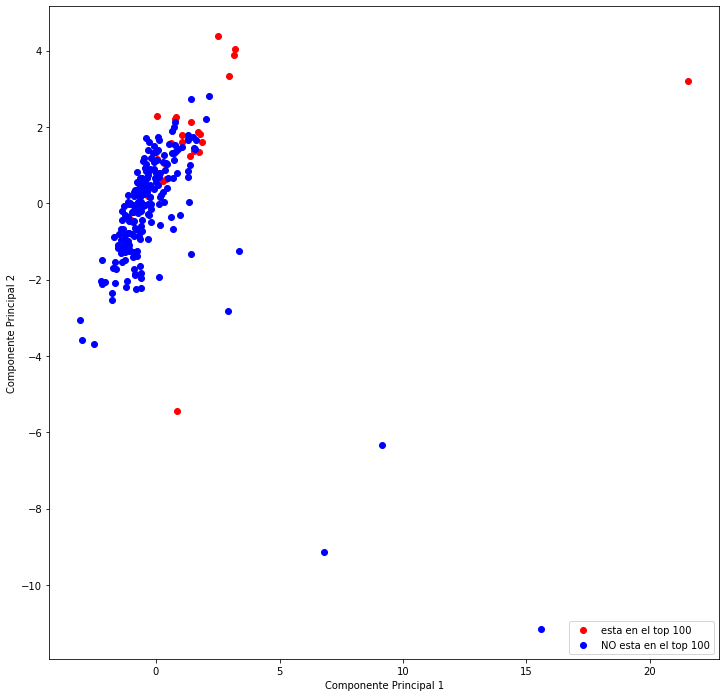

In [17]:
plt.rcParams["figure.figsize"]=12,12

X_values_1 = []
Y_values_1 = []

X_values_0 = []
Y_values_0 = []

for i in range(len(Y)):
    if(y.iloc[i]["isInTop100"]==1):
        X_values_1.append(Y[i][0])
        Y_values_1.append(Y[i][1])
    else:
        X_values_0.append(Y[i][0])
        Y_values_0.append(Y[i][1])
    
plt.scatter(X_values_1,Y_values_1,color="r",label="esta en el top 100")
plt.scatter(X_values_0,Y_values_0,color="b",label="NO esta en el top 100")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc="lower right")

In [ ]:
y